In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

1. Зарегистрироваться на kaggle.com и найти датасет с изображениями, на котором привести инверсию по каждому цветовому каналу.

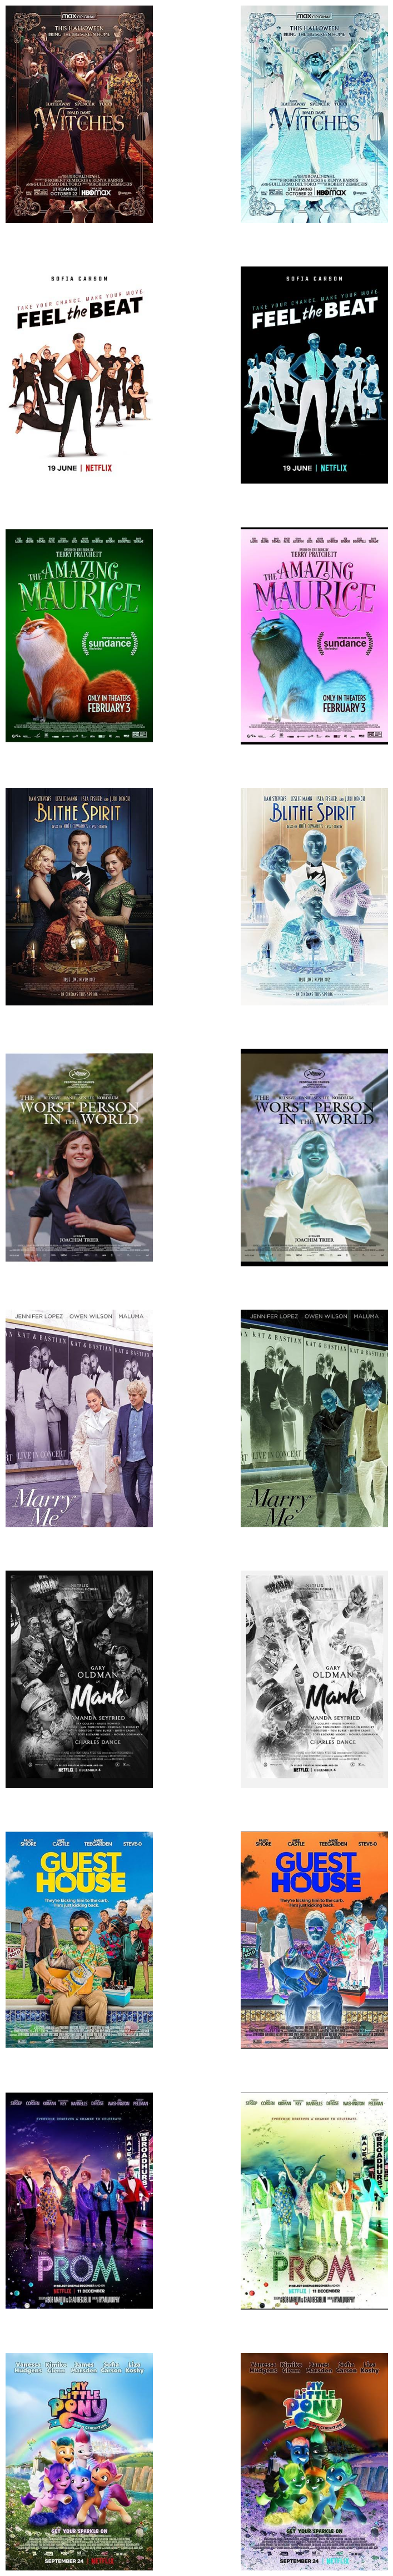

In [ ]:
# 1
images_number = 10

def image_inversion(images_number: str):

  f, axs = plt.subplots(images_number, 2, figsize=(10, 60))
  for i in range(images_number):
    img = plt.imread(f"/content/comedy/tt{i+1}.jpg")
    axs[i,0].imshow(img)
    axs[i,0].axis('off')
    inversion_img = 255 - img
    axs[i,1].imshow(inversion_img)
    axs[i,1].axis('off')

  plt.show()

image_inversion(images_number)

2. Датасет Титаник. Попробовать самостоятельно изучить датасет и посчитать базовые метрики (среднее, сумма, частота, количество пропусков и тд).
Сопоставить колонки Fare и Embarked.
Придумать свою группировку на основе имеющихся или же новых колонок. Объяснить ее смысловое значение (что полезного может быть в информации из этой группировки).
Доп задание. Найти супружеские пары, дети-родители, братья-сестры, используя имеющиеся колонки.

In [ ]:
# 2
df = pd.read_csv('train.csv')

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe(include='all')

PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare    Cabin  \
count   714.000000  891.000000  891.000000     891  891.000000      204   
unique         NaN         NaN         NaN     681         NaN      147   
top            NaN         NaN         NaN  347082         NaN  B96 B98   
freq           NaN         NaN         NaN       7         NaN        4   
mean     29.699118    0.523008    0.381594     NaN   32.204208      NaN   
std      14.526497    1.102743    0.806057     NaN   49.693429      NaN   
min       0.420000    0.000000    0.000000     NaN    0.000000      NaN   
25%      20.125000    0.000000    0.000000     NaN    7.910400      NaN   
50%      28.000000    0.000000    0.000000     NaN   14.454200      NaN   
75%      38.000000    1.000000    0.000000     NaN   31.000000      NaN   
max      80.000000    8.000000    6.000000     NaN  512.329200      NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
# Средняя, максимальная и минимальная стоимость билета в зависимости от порта отправления
df[['Embarked', 'Fare']].groupby('Embarked').agg(['mean', 'max', 'min'])

Fare                  
               mean       max     min
Embarked                             
C         59.954144  512.3292  4.0125
Q         13.276030   90.0000  6.7500
S         27.079812  263.0000  0.0000

In [ ]:
# Максимальная и минимальная стоимость билета в зависимости от порта отправления и класса билета
df[['Embarked', 'Fare', 'Pclass']].groupby(['Embarked', 'Pclass']).agg(['max', 'min'])

Fare         
                      max      min
Embarked Pclass                   
C        1       512.3292  26.5500
         2        41.5792  12.0000
         3        22.3583   4.0125
Q        1        90.0000  90.0000
         2        12.3500  12.3500
         3        29.1250   6.7500
S        1       263.0000   0.0000
         2        73.5000   0.0000
         3        69.5500   0.0000

In [ ]:
# Количество выживших людей по порту отправления
df[['Embarked', 'Survived']].groupby('Embarked').agg(['sum'])

Survived
              sum
Embarked         
C              93
Q              30
S             217

In [ ]:
# Количество выживших людей по полу
df[['Sex', 'Survived']].groupby('Sex').agg(['sum'])

Survived
            sum
Sex            
female      233
male        109

In [ ]:
# Количество выживших людей по классу билета
df[['Pclass', 'Survived']].groupby('Pclass').agg(['sum'])

Survived
            sum
Pclass         
1           136
2            87
3           119

In [ ]:
# Количество выживших женщин по классу билета
data = df[df.Sex == 'female']
data[['Pclass', 'Survived']].groupby('Pclass').agg(['sum'])

Survived
            sum
Pclass         
1            91
2            70
3            72

In [ ]:
# Количество выживших мужчин по классу билета
data = df[df.Sex == 'male']
data[['Pclass', 'Survived']].groupby('Pclass').agg(['sum'])

Survived
            sum
Pclass         
1            45
2            17
3            47

In [ ]:
df['LastName'] = df.Name.apply(lambda x: x.split(',')[0])

In [ ]:
# Супружеские пары
spouses = df[(df.SibSp == 1)].groupby([df.LastName, df.Ticket]).count()
print(f'Количество супружеских пар: {len(spouses)}')

Количество супружеских пар: 147


In [ ]:
# Родители-дети
parents_children = df[(df.Parch > 0)].groupby([df.LastName, df.Ticket]).count()
print(f'Количество родителей-детей: {len(parents_children)}')

Количество родителей-детей: 104


In [ ]:
# Братья-сестры
brothers_sisters = df[(df.SibSp > 0)].groupby([df.LastName, df.Ticket]).count()
print(f'Количество братьев-сестер: {len(brothers_sisters)}')

Количество братьев-сестер: 167
